# Chapter 1 - Special Relativity and Flat Spacetime

What we experience as gravity is a manifestion of spacetime itself.

So we need to understand spacetime, curvature, and how curvature becomes gravity.



In [1]:
# Suggested imports (keep it consistent across notebooks)
import sympy as sp
from IPython.display import display, Math

sp.init_printing()

Previous theory of gravity is:

In [2]:
from sympy.physics.mechanics import dynamicsymbols
from sympy.vector import CoordSys3D

N = CoordSys3D('N')
t = sp.symbols('t')

x, y, z = dynamicsymbols('x y z')
m, F = dynamicsymbols('m F')

x, y = 0, 0

z = 0.5 * -9.8 * t ** 2

r_vec = x*N.i + y*N.j + z*N.k

a = r_vec.diff(t, 2)

sp.Eq(F, sp.UnevaluatedExpr(m*a), evaluate=False)


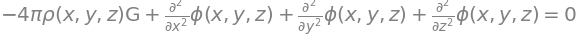

In [3]:
from sympy.physics.units import gravitational_constant as G

x, y, z = sp.symbols('x y z')
phi = sp.Function('phi')(x, y, z)
rho = sp.Function('rho')(x, y, z)

pi = sp.pi
poisson = (
    sp.diff(phi, x, 2)
  + sp.diff(phi, y, 2)
  + sp.diff(phi, z, 2)
  - 4 * pi * G * rho
)

sp.Eq(poisson, 0)

## Section 1.2 - Space and Time, separately and together


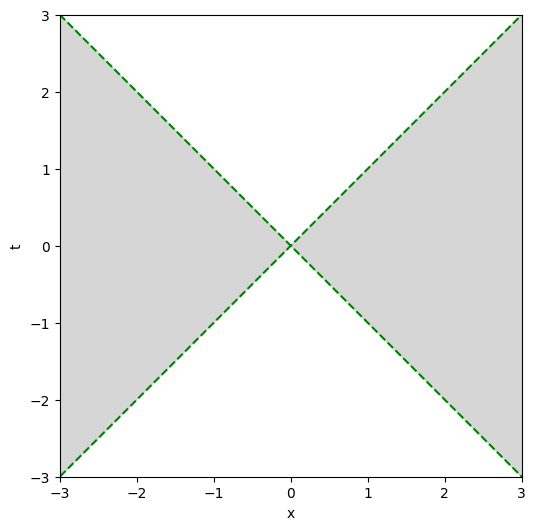

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6));
    
ax.set_aspect('equal')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel('x')
ax.set_ylabel('t')

N = 201
t = np.linspace(-100, 100, N)

# Plot the light cones
ax.plot(t, t, color='green', linestyle='--')
ax.plot(t, -t, color='green', linestyle='--')
ax.fill_between(t, t, -t, color='lightgray', alpha=0.7)
ax.fill_between(t, -t, t, color='lightgray', alpha=0.7)


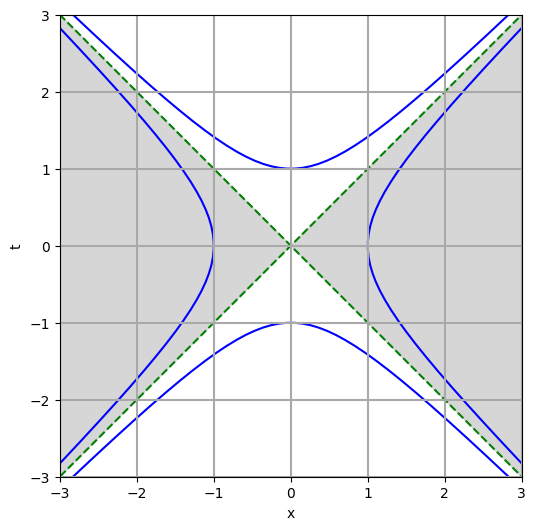

In [5]:
t_fine = np.linspace(-5, 5, 100)
xh1 = np.cosh(t_fine)
yh1 = np.sinh(t_fine)
xh2 = -np.cosh(t_fine)
yh2 = np.sinh(t_fine)

N = 201
t = np.linspace(-100, 100, N)
x = np.linspace(-100, 100, N)
T, X = np.meshgrid(t, x)

ax.plot(xh1, yh1, color='blue')
ax.plot(xh2, yh2, color='blue')
ax.plot(yh1, xh1, color='blue')
ax.plot(yh2, xh2, color='blue')

ax.plot(T, X, '-', color='darkgray')
ax.plot(X, T, '-', color='darkgray')

display(fig)

In [6]:
def lorentz_transform(beta):
    gamma = 1 / np.sqrt(1 - beta**2)
    return np.array([[gamma, gamma*beta], [gamma*beta, gamma]])



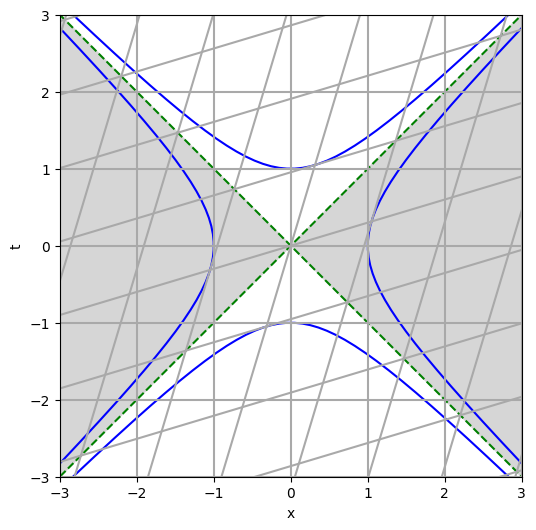

In [7]:
beta = 0.3
# Calculate the transformed coordinate grid:
TX = np.array([T.reshape(-1), X.reshape(-1)])
TX_transformed = lorentz_transform(beta).dot(TX)
T_transformed = TX_transformed[0].reshape(T.shape)
X_transformed = TX_transformed[1].reshape(X.shape)
# Plot the transformed grid
ax.plot(T_transformed, X_transformed, '-', color='darkgray')
ax.plot(X_transformed, T_transformed, '-', color='darkgrey')

display(fig)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider


def lorentz_transform(beta):
    gamma = 1 / np.sqrt(1 - beta**2)
    return np.array([[gamma, gamma*beta], [gamma*beta, gamma]])


def make_plot(beta):

    fig, ax = plt.subplots(figsize=(6, 6));
    
    ax.set_aspect('equal')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_xlabel('x')
    ax.set_ylabel('t')

    # Define the coarse grid:
    N = 201
    t = np.linspace(-100, 100, N)
    x = np.linspace(-100, 100, N)
    T, X = np.meshgrid(t, x)

    # Plot the light cones
    ax.plot(t, t, color='green', linestyle='--')
    ax.plot(t, -t, color='green', linestyle='--')
    ax.fill_between(t, t, -t, color='gray', alpha=0.7)
    ax.fill_between(t, -t, t, color='gray', alpha=0.7)


    # Calculate the transformed coordinate grid:
    TX = np.array([T.reshape(-1), X.reshape(-1)])
    TX_transformed = lorentz_transform(beta).dot(TX)
    T_transformed = TX_transformed[0].reshape(T.shape)
    X_transformed = TX_transformed[1].reshape(X.shape)

    # Plot the original grid
    ax.plot(T, X, '-', color='lightgray')
    ax.plot(X, T, '-', color='lightgray')


    # Plot the invariant hyperbola
    t_fine = np.linspace(-5, 5, 100)
    xh1 = np.cosh(t_fine)
    yh1 = np.sinh(t_fine)
    xh2 = -np.cosh(t_fine)
    yh2 = np.sinh(t_fine)

    ax.plot(xh1, yh1, color='blue')
    ax.plot(xh2, yh2, color='blue')
    ax.plot(yh1, xh1, color='blue')
    ax.plot(yh2, xh2, color='blue')

    # Plot the transformed grid
    ax.plot(T_transformed, X_transformed, '-', color='black')
    ax.plot(X_transformed, T_transformed, '-', color='black')
    ax.set_title(f'$\\beta$ = {beta}')
    
    plt.show()

interact(make_plot, beta=FloatSlider(min=0, max=0.99999, step=0.02, value=0.));

interactive(children=(FloatSlider(value=0.0, description='beta', max=0.99999, step=0.02), Output()), _dom_clas…

## Show a cube traveling at 0.75c

beta = 0.9375
gamma = 2.8736848324283986  -> contraction factor along motion = 1/gamma = 0.34798527267687634


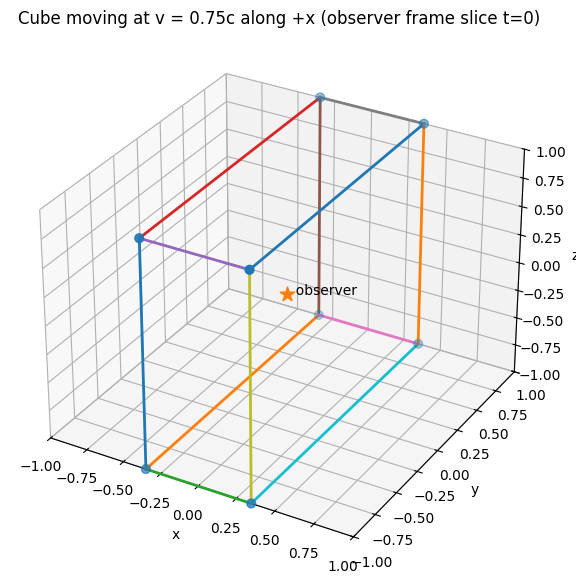


Expected rest edge length L = 2.0
Expected observed edge length along x: 0.6959705453537527
Observed x-extent from plot data: 0.6959705453537527


In [9]:
"""
Lorentz-transform a 3D cube moving at v = 0.75 c and visualize (wireframe)
what the cube looks like in the OBSERVER frame at a single observer-time slice.

- Uses SymPy to build the Minkowski metric and Lorentz boost matrix.
- Uses Matplotlib to render a 3D wireframe of the cube at t_obs = 0.
- Units: set c = 1 (so v=0.75 means 0.75c).
- Motion is along +x (the “in front of” direction can be interpreted as line-of-sight).
  You can switch to motion along y or z by permuting axes.

What you should see:
- Length contraction along the direction of motion (x): factor 1/gamma.
"""

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) Symbolic SR setup (SymPy)
# -----------------------------
v = sp.Rational(15, 16)  # 15/16
c = sp.Integer(1)      # set c=1 natural units
beta = v / c
gamma = 1 / sp.sqrt(1 - beta**2)

# Minkowski metric (signature: - + + +)
eta = sp.diag(-1, 1, 1, 1)

# Lorentz boost along +x:
# (ct', x', y', z')^T = Lambda * (ct, x, y, z)^T
Lambda = sp.Matrix([
    [gamma,    -gamma*beta, 0, 0],
    [-gamma*beta, gamma,    0, 0],
    [0,         0,          1, 0],
    [0,         0,          0, 1],
])

# Verify Minkowski invariance symbolically: Lambda^T eta Lambda == eta
check = sp.simplify(Lambda.T * eta * Lambda - eta)
assert check == sp.zeros(4), "Lorentz transform failed Minkowski invariance check!"

print("beta =", float(beta))
print("gamma =", float(gamma), " -> contraction factor along motion = 1/gamma =", float(1/gamma))

# -----------------------------
# 2) Define a cube in its REST frame S'
# -----------------------------
# Cube centered at x'=0, y'=0, z'=0 with edge length L (rest length)
L = sp.Symbol('L', positive=True, real=True)
half = L/2

# 8 vertices in rest frame S' at some chosen rest-frame time t'=0
# We'll work in 4-vector form (ct', x', y', z')
verts_Sp = [
    sp.Matrix([0, -half, -half, -half]),
    sp.Matrix([0, -half, -half,  half]),
    sp.Matrix([0, -half,  half, -half]),
    sp.Matrix([0, -half,  half,  half]),
    sp.Matrix([0,  half, -half, -half]),
    sp.Matrix([0,  half, -half,  half]),
    sp.Matrix([0,  half,  half, -half]),
    sp.Matrix([0,  half,  half,  half]),
]

# Edges (pairs of vertex indices) for wireframe drawing
edges = [
    (0,1),(0,2),(0,4),
    (1,3),(1,5),
    (2,3),(2,6),
    (3,7),
    (4,5),(4,6),
    (5,7),
    (6,7),
]

# -----------------------------
# 3) Transform cube from S' to observer frame S
# -----------------------------
# Our Lambda above maps S -> S'. We want S' -> S (inverse boost).
# Inverse boost is beta -> -beta (or simply Lambda.inv()).
Lambda_inv = sp.simplify(Lambda.inv())

# Transform vertices:
# X_S = Lambda_inv * X_S'
verts_S = [sp.simplify(Lambda_inv * Xp) for Xp in verts_Sp]

# verts_S are 4-vectors (ct, x, y, z) at generally DIFFERENT observer times ct,
# because we took t'=0 for all vertices. That illustrates "relativity of simultaneity".
# For a clean "what does it look like at observer time t=0?", we should instead take
# events on each vertex worldline such that t_obs = 0. We'll do that now.

# Each material point of the cube has fixed (x',y',z') in rest frame.
# Its worldline in S' is: (ct', x', y', z') with varying t'.
# Transform to S, then solve for ct = 0 to find the corresponding ct' for that point.

ctprime = sp.Symbol('ctprime', real=True)

def event_at_observer_time_zero(xp, yp, zp):
    # Event in S' with variable ct' on worldline of a vertex at fixed (xp,yp,zp)
    Xp = sp.Matrix([ctprime, xp, yp, zp])
    X = sp.simplify(Lambda_inv * Xp)  # to observer frame
    ct_expr = sp.simplify(X[0])
    # Solve ct_expr = 0 for ctprime
    sol = sp.solve(sp.Eq(ct_expr, 0), ctprime)
    # For a standard boost this is linear => one solution
    ctprime_sol = sol[0]
    # Plug back to get spatial coordinates at ct=0
    X_at = sp.simplify(X.subs(ctprime, ctprime_sol))
    return X_at  # (ct=0, x, y, z)

# Build "simultaneous in observer frame" vertices (t=0 slice in S)
verts_S_t0 = []
for V in verts_Sp:
    xp, yp, zp = V[1], V[2], V[3]
    verts_S_t0.append(event_at_observer_time_zero(xp, yp, zp))

# Lambdify to numeric arrays
L_val = 2.0  # choose a rest edge length
f_xyz = sp.lambdify((L,), [(V[1], V[2], V[3]) for V in verts_S_t0], "numpy")
xyz = np.array(f_xyz(L_val), dtype=float)  # shape (8,3)

# -----------------------------
# 4) Plot the cube wireframe in observer frame at t=0
# -----------------------------
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

# Draw edges
for i, j in edges:
    xs = [xyz[i,0], xyz[j,0]]
    ys = [xyz[i,1], xyz[j,1]]
    zs = [xyz[i,2], xyz[j,2]]
    ax.plot(xs, ys, zs, linewidth=2)

# Mark vertices
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], s=40)

# Add a simple "observer" marker at the origin
ax.scatter([0],[0],[0], s=120, marker='*')
ax.text(0,0,0, "  observer", fontsize=10)

ax.set_title("Cube moving at v = 0.75c along +x (observer frame slice t=0)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Make axes approximately equal scale for better visual interpretation
mins = xyz.min(axis=0)
maxs = xyz.max(axis=0)
ranges = maxs - mins
max_range = ranges.max()
centers = (maxs + mins)/2

ax.set_xlim(centers[0] - max_range/2, centers[0] + max_range/2)
ax.set_ylim(centers[1] - max_range/2, centers[1] + max_range/2)
ax.set_zlim(centers[2] - max_range/2, centers[2] + max_range/2)

plt.show()

# -----------------------------
# 5) Optional: show expected contraction
# -----------------------------
print("\nExpected rest edge length L =", L_val)
print("Expected observed edge length along x:", L_val/float(gamma))
print("Observed x-extent from plot data:", float(xyz[:,0].max() - xyz[:,0].min()))


## Animated Cube


beta = 0.75
gamma = 1.511857892036909  contraction factor 1/gamma = 0.6614378277661477


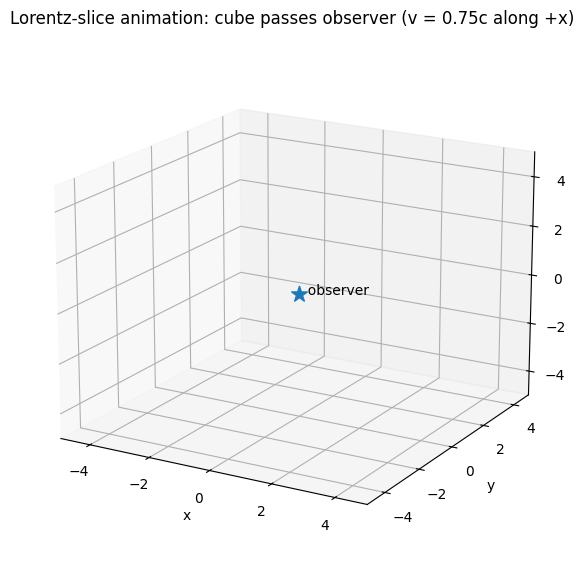

In [10]:
"""
Animate a Lorentz-contracted cube passing a stationary observer at the origin.

- Uses SymPy to build Minkowski metric and Lorentz boost, and verifies invariance.
- Uses a *simultaneity slice in the observer frame* at each animation time t:
    For each vertex (fixed x',y',z' in cube rest frame), solve for ct' such that ct = ct_target,
    then transform to get (x,y,z) at that observer time.
- Units: c = 1. Speed v = 0.75 means 0.75c.
- Motion along +x. The cube's center passes the observer at t=0.

NOTE:
This is NOT a "what a camera sees" animation (no light travel time / Terrell rotation).
It is an animation of the cube's *coordinates in the observer frame* at successive times.

Jupyter tips:
- In classic notebook: try `%matplotlib notebook` for interactive animation.
- In JupyterLab: you may need `ipympl` and `%matplotlib widget`.
"""


import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# -----------------------------
# 1) Symbolic SR setup (SymPy)
# -----------------------------
v = sp.Rational(3, 4)  # 0.75
c = sp.Integer(1)      # natural units
beta = v / c
gamma = 1 / sp.sqrt(1 - beta**2)

# Minkowski metric (signature - + + +)
eta = sp.diag(-1, 1, 1, 1)

# Lorentz boost along +x mapping S -> S'
Lambda = sp.Matrix([
    [gamma,       -gamma*beta, 0, 0],
    [-gamma*beta,  gamma,      0, 0],
    [0,            0,          1, 0],
    [0,            0,          0, 1],
])

# Check Lorentz invariance
check = sp.simplify(Lambda.T * eta * Lambda - eta)
assert check == sp.zeros(4), "Lorentz transform failed Minkowski invariance check!"

# We want S' -> S (inverse boost)
Lambda_inv = sp.simplify(Lambda.inv())

print("beta =", float(beta))
print("gamma =", float(gamma), " contraction factor 1/gamma =", float(1/gamma))

# -----------------------------
# 2) Cube in rest frame S'
# -----------------------------
L = sp.Symbol('L', positive=True, real=True)
half = L / 2

# Vertices at fixed (x',y',z') in S' (cube centered at origin in its rest frame)
verts_rest_xyz = [
    (-half, -half, -half),
    (-half, -half,  half),
    (-half,  half, -half),
    (-half,  half,  half),
    ( half, -half, -half),
    ( half, -half,  half),
    ( half,  half, -half),
    ( half,  half,  half),
]

edges = [
    (0,1),(0,2),(0,4),
    (1,3),(1,5),
    (2,3),(2,6),
    (3,7),
    (4,5),(4,6),
    (5,7),
    (6,7),
]

# -----------------------------
# 3) Build a function: vertices at observer time ct = ct_target
# -----------------------------
ctprime = sp.Symbol('ctprime', real=True)
ct_target = sp.Symbol('ct_target', real=True)

def vertex_event_at_observer_time(xp, yp, zp):
    """
    For a fixed rest-frame point (xp,yp,zp), find the event on its worldline
    that lands on observer time ct = ct_target.
    Return the transformed 4-vector (ct, x, y, z) with ct = ct_target.
    """
    Xp = sp.Matrix([ctprime, xp, yp, zp])      # event in S'
    X  = sp.simplify(Lambda_inv * Xp)          # transform to S
    eq = sp.Eq(X[0], ct_target)                # enforce observer simultaneity slice
    sol = sp.solve(eq, ctprime)
    # For a standard boost this should be linear => single solution
    ctprime_sol = sol[0]
    X_at = sp.simplify(X.subs(ctprime, ctprime_sol))
    return X_at

# Symbolic expressions for all 8 vertices as functions of (L, ct_target)
verts_S_expr = []
for xp, yp, zp in verts_rest_xyz:
    verts_S_expr.append(vertex_event_at_observer_time(xp, yp, zp))

# Lambdify spatial coordinates (x,y,z) for speed
f_xyz = sp.lambdify(
    (L, ct_target),
    [(V[1], V[2], V[3]) for V in verts_S_expr],
    "numpy"
)

# -----------------------------
# 4) Animation parameters
# -----------------------------
L_val = 2.0            # rest edge length
t_min, t_max = -6.0, 6.0
fps = 30
duration_s = 6
nframes = fps * duration_s
times = np.linspace(t_min, t_max, nframes)

# -----------------------------
# 5) Matplotlib 3D setup
# -----------------------------
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Lorentz-slice animation: cube passes observer (v = 0.75c along +x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Observer at origin
obs = ax.scatter([0],[0],[0], s=140, marker='*')
ax.text(0,0,0, "  observer", fontsize=10)

# Pre-create line objects for edges
line_objs = []
for _ in edges:
    (ln,) = ax.plot([0,0], [0,0], [0,0], linewidth=2)
    line_objs.append(ln)

# Vertex markers
verts_scatter = ax.scatter([], [], [], s=40)

# Set a fixed view box so the cube doesn't rescale the axes while animating
# Choose a reasonable bounding cube around origin
box = 5.0
ax.set_xlim(-box, box)
ax.set_ylim(-box, box)
ax.set_zlim(-box, box)

# Optional: choose a nice viewing angle
ax.view_init(elev=18, azim=-60)

def compute_xyz(ct):
    xyz = np.array(f_xyz(L_val, ct), dtype=float)  # shape (8,3)
    return xyz

def update(frame_idx):
    ct = times[frame_idx]
    xyz = compute_xyz(ct)

    # Update edges
    for k, (i, j) in enumerate(edges):
        line_objs[k].set_data([xyz[i,0], xyz[j,0]], [xyz[i,1], xyz[j,1]])
        line_objs[k].set_3d_properties([xyz[i,2], xyz[j,2]])

    # Update vertex scatter
    verts_scatter._offsets3d = (xyz[:,0], xyz[:,1], xyz[:,2])

    # Update title with time
    ax.set_title(f"Cube passing observer (v=0.75c), observer time t = {ct:.2f} (c=1)")
    return line_objs + [verts_scatter]

ani = FuncAnimation(fig, update, frames=len(times), interval=1000/fps, blit=False)

plt.show()

# If you want to save to MP4 (requires ffmpeg installed), uncomment:
# ani.save("cube_lorentz_animation.mp4", fps=fps, dpi=160)
ani

## Cube in the background with observer the camera

beta = -0.968750, gamma = 4.031621, contraction (1/gamma) = 0.248039


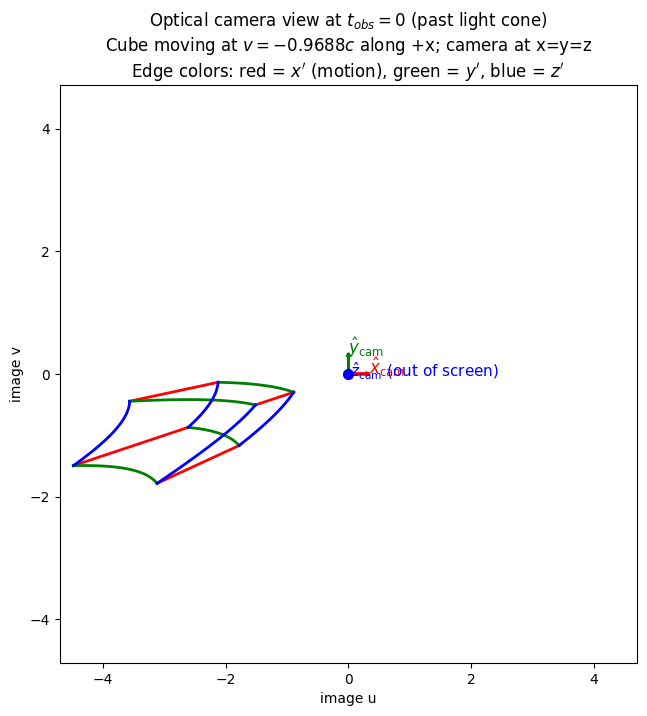

In [21]:
"""
WORKING PROGRAM: Optical (camera) view of a cube moving at v = 15/16 c at a single observer time,
with:
  1) Camera located on the line x=y=z (equidistant from x,y,z axes).
  2) Proper past-light-cone (retarded-time) rendering (i.e., what the camera *sees* at t_obs=0).
  3) Observer (camera) axes drawn on the image: x_cam (red), y_cam (green), z_cam (blue label).
  4) Cube EDGES drawn in different colors by rest-frame orientation:
        x' edges (direction of motion) = red
        y' edges = green
        z' edges = blue

Physics notes:
- Units: c = 1
- Minkowski metric signature: (-, +, +, +)
- Motion: cube moves along +x in observer/world frame S.
- Lorentz boost uses SymPy and is checked: Lambda^T eta Lambda = eta.
- This is NOT a simultaneity-slice rendering; it is optical (past light cone),
  so you will see Terrell/Penrose effects at high speed.

Dependencies: sympy, numpy, matplotlib
"""

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


# ------------------------------------------------------------
# 1) Relativity setup (SymPy): Minkowski metric + Lorentz boost
# ------------------------------------------------------------
beta = sp.Rational(-31, 32)  # v/c
gamma = 1 / sp.sqrt(1 - beta**2)

# Minkowski metric (signature - + + +)
eta = sp.diag(-1, 1, 1, 1)

# Lorentz boost along +x mapping S -> S'
Lambda = sp.Matrix([
    [gamma,          -gamma*beta, 0, 0],
    [-gamma*beta,    gamma,       0, 0],
    [0,              0,           1, 0],
    [0,              0,           0, 1],
])

# Inverse boost maps S' -> S
Lambda_inv = sp.simplify(Lambda.inv())

# Verify Lorentz invariance
chk = sp.simplify(Lambda.T * eta * Lambda - eta)
assert chk == sp.zeros(4), "Lorentz transform failed Minkowski invariance check!"

beta_f = float(beta)
gamma_f = float(gamma)
print(f"beta = {beta_f:.6f}, gamma = {gamma_f:.6f}, contraction (1/gamma) = {1/gamma_f:.6f}")

# Convert Lambda_inv to numpy float matrix for speed
Lambda_inv_np = np.array(Lambda_inv.evalf(), dtype=float)


# ------------------------------------------------------------
# 2) Scene parameters
# ------------------------------------------------------------
# Cube rest size
L = 8.0
h = L / 2

# Translation placing the cube center somewhere "in front" of the camera in world frame S
# (tA, xA, yA, zA)
cube_center = np.array([0.0, 6.0, 0.0, 0.0], dtype=float)

# Camera position: on x=y=z line (equidistant to x,y,z axes)
d = 12.0
cam_pos = np.array([d, d, d], dtype=float)

# Camera looks at the cube center
target = cube_center[1:].copy()

# Camera up direction (world +z)
up = np.array([0.0, 0.0, 1.0], dtype=float)

# Pinhole camera focal length (controls field of view)
f = 1.0


# ------------------------------------------------------------
# 3) Cube edges in rest frame S' colored by orientation
# ------------------------------------------------------------
edges_rest = []

# x'-directed edges (direction of motion)
for y in (-h, h):
    for z in (-h, h):
        edges_rest.append(((-h, y, z), (h, y, z), "x"))

# y'-directed edges
for x in (-h, h):
    for z in (-h, h):
        edges_rest.append(((x, -h, z), (x, h, z), "y"))

# z'-directed edges
for x in (-h, h):
    for y in (-h, h):
        edges_rest.append(((x, y, -h), (x, y, h), "z"))

edge_colors = {"x": "red", "y": "green", "z": "blue"}


# ------------------------------------------------------------
# 4) Camera basis (look-at transform)
# ------------------------------------------------------------
def normalize(v):
    n = np.linalg.norm(v)
    return v if n == 0 else (v / n)

forward = normalize(target - cam_pos)          # points from camera to target
right = normalize(np.cross(forward, up))       # camera x-axis
true_up = np.cross(right, forward)             # camera y-axis (orthonormal)

def project_point_world_to_image(p_world):
    """
    Convert world point p_world to camera coords and project onto image plane.
    Returns (u,v) or None if point is behind camera.
    """
    rel = p_world - cam_pos
    x_cam = np.dot(right, rel)
    y_cam = np.dot(true_up, rel)
    z_cam = np.dot(forward, rel)   # depth along optical axis
    if z_cam <= 1e-9:
        return None
    u = f * (x_cam / z_cam)
    v = f * (y_cam / z_cam)
    return u, v


# ------------------------------------------------------------
# 5) Past-light-cone emission solver for each rest-frame point
# ------------------------------------------------------------
def emission_event_on_past_light_cone_for_camera(xp, yp, zp):
    """
    For a fixed rest-frame point (xp,yp,zp), find t' such that the emitted light
    arrives at the camera at observation event (t_obs=0, r_obs=cam_pos).

    Worldline in S': X'(t') = (t', xp, yp, zp)
    Transform to S: X(t') = Lambda_inv * X'(t') + cube_center

    Light cone condition centered at observer event (0, cam_pos):
        (t - 0)^2 = ||r - cam_pos||^2, with t < 0
    Solve for t' (quadratic).
    """
    # X(t') = P * t' + Q
    P = Lambda_inv_np[:, 0]  # coefficients multiplying t'
    Q = (
        Lambda_inv_np[:, 1] * xp +
        Lambda_inv_np[:, 2] * yp +
        Lambda_inv_np[:, 3] * zp +
        cube_center
    )

    P0, Q0 = P[0], Q[0]
    Psp, Qsp = P[1:], Q[1:]

    # relative spatial position wrt camera: (r - cam_pos) = (Psp t' + (Qsp - cam_pos))
    Qrel = Qsp - cam_pos

    # Solve: (P0 t' + Q0)^2 - ||Psp t' + Qrel||^2 = 0
    a = P0 * P0 - np.dot(Psp, Psp)
    b = 2.0 * (P0 * Q0 - np.dot(Psp, Qrel))
    c0 = Q0 * Q0 - np.dot(Qrel, Qrel)

    disc = b * b - 4.0 * a * c0
    if disc < 0:
        return None
    sqrt_disc = np.sqrt(disc)

    tprime1 = (-b - sqrt_disc) / (2.0 * a)
    tprime2 = (-b + sqrt_disc) / (2.0 * a)

    X1 = P * tprime1 + Q
    X2 = P * tprime2 + Q

    # Choose physically relevant solution: emission time t < 0, closest to 0
    candidates = []
    if X1[0] < 0:
        candidates.append(X1)
    if X2[0] < 0:
        candidates.append(X2)
    if not candidates:
        return None
    return max(candidates, key=lambda Xc: Xc[0])  # largest negative t


# ------------------------------------------------------------
# 6) Render: sample along each edge and project to image
# ------------------------------------------------------------
edge_samples = 50  # increase for smoother lines

projected_edges = []
for (p0, p1, axis) in edges_rest:
    pts_u, pts_v = [], []
    for s in np.linspace(0.0, 1.0, edge_samples):
        xp = (1 - s) * p0[0] + s * p1[0]
        yp = (1 - s) * p0[1] + s * p1[1]
        zp = (1 - s) * p0[2] + s * p1[2]

        X = emission_event_on_past_light_cone_for_camera(xp, yp, zp)
        if X is None:
            continue

        r_world = X[1:]  # (x,y,z) in world
        uv = project_point_world_to_image(r_world)
        if uv is None:
            continue

        pts_u.append(uv[0])
        pts_v.append(uv[1])

    if len(pts_u) > 1:
        projected_edges.append((np.array(pts_u), np.array(pts_v), edge_colors[axis]))


# ------------------------------------------------------------
# 7) Plot: colored edges + observer axes overlay
# ------------------------------------------------------------
plt.figure(figsize=(7.5, 7.5))

# Draw cube edges
for u, v, col in projected_edges:
    plt.plot(u, v, color=col, linewidth=2)

plt.gca().set_aspect("equal", adjustable="box")
plt.xlabel("image u")
plt.ylabel("image v")
plt.title(
    "Optical camera view at $t_{obs}=0$ (past light cone)\n"
    f"Cube moving at $v={beta_f:.4f}c$ along +x; camera at x=y=z\n"
    "Edge colors: red = $x'$ (motion), green = $y'$, blue = $z'$"
)

# --- Observer/camera axes in image plane ---
axis_len = 0.3
u0, v0 = 0.0, 0.0

# x_cam axis (right) -> red
plt.arrow(
    u0, v0,
    axis_len, 0.0,
    head_width=0.03, head_length=0.04,
    fc="red", ec="red", linewidth=2
)
plt.text(axis_len * 1.1, 0.0, r"$\hat{x}_{\rm cam}$", color="red", fontsize=12)

# y_cam axis (up) -> green
plt.arrow(
    u0, v0,
    0.0, axis_len,
    head_width=0.03, head_length=0.04,
    fc="green", ec="green", linewidth=2
)
plt.text(0.0, axis_len * 1.1, r"$\hat{y}_{\rm cam}$", color="green", fontsize=12)

# z_cam axis (forward / optical axis) -> blue marker+label
plt.scatter([0.0], [0.0], s=50, c="blue")
plt.text(0.02, -0.06, r"$\hat{z}_{\rm cam}$ (out of screen)", color="blue", fontsize=11)

# Auto-fit view window
if projected_edges:
    all_u = np.concatenate([u for (u, _, _) in projected_edges])
    all_v = np.concatenate([v for (_, v, _) in projected_edges])
    m = max(np.max(np.abs(all_u)), np.max(np.abs(all_v)))
    m = max(m, 0.5)  # ensure we can see axes even if cube is tiny
    plt.xlim(-1.05*m, 1.05*m)
    plt.ylim(-1.05*m, 1.05*m)

plt.show()


## Walking in a square on space over a period of time.

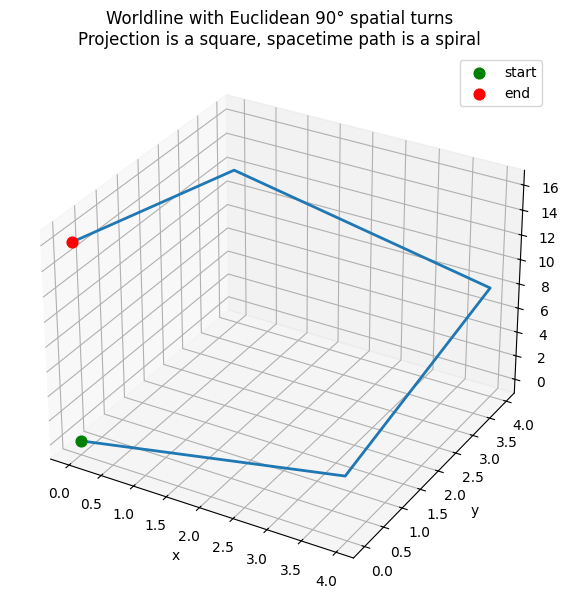

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Parameters
# ----------------------------
c = 1.0          # units with c=1
v = 0.6          # constant spatial speed (< c)
L = 4.0          # side length of square
dt = 0.05        # time step

# Directions for square: +x, +y, -x, -y
directions = [
    np.array([1, 0]),
    np.array([0, 1]),
    np.array([-1, 0]),
    np.array([0, -1])
]

# ----------------------------
# Build worldline
# ----------------------------
x, y, t = 0.0, 0.0, 0.0
X, Y, T = [x], [y], [t]

for d in directions:
    steps = int(L / (v * dt))
    for _ in range(steps):
        x += v * d[0] * dt
        y += v * d[1] * dt
        t += dt
        X.append(x)
        Y.append(y)
        T.append(t)

X = np.array(X)
Y = np.array(Y)
CT = c * np.array(T)

# ----------------------------
# Plot 3D spacetime path
# ----------------------------
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection="3d")

ax.plot(X, Y, CT, linewidth=2)
ax.scatter(X[0], Y[0], CT[0], color="green", s=60, label="start")
ax.scatter(X[-1], Y[-1], CT[-1], color="red", s=60, label="end")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("ct")
ax.set_title("Worldline with Euclidean 90° spatial turns\nProjection is a square, spacetime path is a spiral")

ax.legend()
plt.show()


## Show spiral from a moving observer

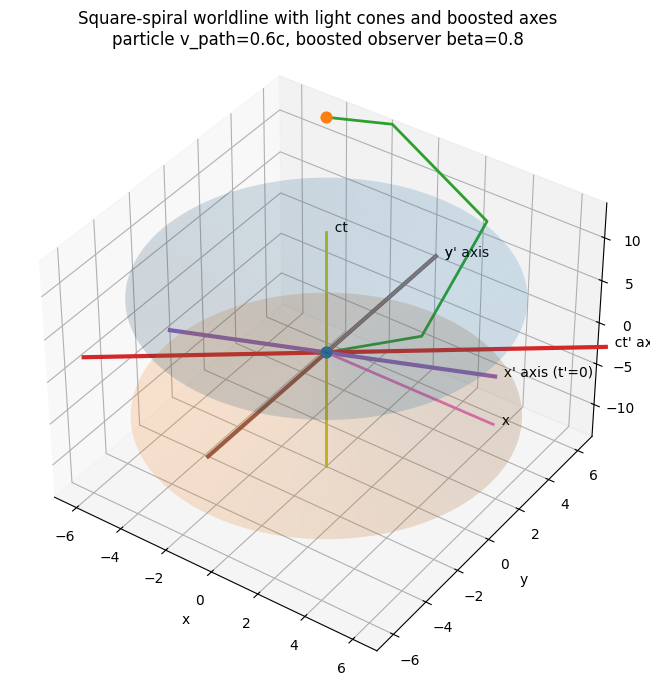

In [26]:
"""
Draw:
1) A "square-spiral" worldline in 2+1D: (x(t), y(t), ct(t)) with ct vertical.
2) The light cone(s): ct = ±sqrt(x^2 + y^2).
3) Boosted axes for an observer moving at speed v along +x:
   - ct' axis: worldline of the boosted observer's origin (x=vt, y=0)
   - x' axis: the line of simultaneity t'=0 -> ct = beta x, y=0
   - y' axis: same as y axis (since boost is along x), drawn at ct=0, x=0.

Notes:
- Units: c=1.
- This is a spacetime diagram (not an optical "camera view").
- The spiral is timelike (choose v_path < 1).
"""

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Parameters
# ----------------------------
c = 1.0

# Spiral (particle) motion: constant speed segments in the x-y plane, with time increasing
v_path = 0.6         # particle speed in space (< 1)
L = 4.0              # side length of the square in x-y projection
dt = 0.03            # time step
turns = 1            # number of square loops (1 = 4 segments)

# Boosted observer speed along +x (for axes)
beta = 0.8           # v_obs/c (choose close to 1 to see strong tilt)
assert 0 <= beta < 1

# Plot extents
Rmax = 7.0           # how wide to draw light cone surface in x-y
Tmax = 14.0          # how tall to draw in ct

# ----------------------------
# 1) Build square-spiral worldline
# ----------------------------
dirs = [
    np.array([1, 0]),
    np.array([0, 1]),
    np.array([-1, 0]),
    np.array([0, -1]),
]

x, y, t = 0.0, 0.0, 0.0
X, Y, CT = [x], [y], [c*t]

for _ in range(turns):
    for d in dirs:
        steps = int(L / (v_path * dt))
        for _ in range(steps):
            x += v_path * d[0] * dt
            y += v_path * d[1] * dt
            t += dt
            X.append(x)
            Y.append(y)
            CT.append(c * t)

X = np.array(X)
Y = np.array(Y)
CT = np.array(CT)

# ----------------------------
# 2) Build light cone surfaces: ct = ±sqrt(x^2+y^2)
# ----------------------------
# Use a polar mesh for a smooth cone
nr = 80
ntheta = 120
r = np.linspace(0, Rmax, nr)
theta = np.linspace(0, 2*np.pi, ntheta)
R, TH = np.meshgrid(r, theta)

XC = R * np.cos(TH)
YC = R * np.sin(TH)
CT_plus = R          # since c=1 => ct = r
CT_minus = -R

# We'll draw only the portion within [-Tmax, Tmax]
mask_plus = CT_plus <= Tmax
mask_minus = (-CT_minus) <= Tmax

# ----------------------------
# 3) Boosted axes in the original (x,y,ct) coordinates
# ----------------------------
# ct' axis: worldline of boosted observer at x = beta * ct, y=0
ct_line = np.linspace(-Tmax, Tmax, 200)
x_ctprime = beta * ct_line
y_ctprime = np.zeros_like(ct_line)

# x' axis: t' = 0 line in 1+1 is ct = beta x. We'll draw it at y=0.
x_line = np.linspace(-Rmax, Rmax, 200)
ct_xprime = beta * x_line
y_xprime = np.zeros_like(x_line)

# y' axis: unchanged by boost in x; draw at ct=0, x=0 as a reference
y_line = np.linspace(-Rmax, Rmax, 200)
x_yprime = np.zeros_like(y_line)
ct_yprime = np.zeros_like(y_line)

# ----------------------------
# 4) Plot everything
# ----------------------------
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111, projection="3d")

# Light cone (future and past)
ax.plot_surface(
    XC, YC, CT_plus,
    rstride=2, cstride=2,
    alpha=0.18, linewidth=0
)
ax.plot_surface(
    XC, YC, CT_minus,
    rstride=2, cstride=2,
    alpha=0.18, linewidth=0
)

# Spiral worldline
ax.plot(X, Y, CT, linewidth=2)
ax.scatter([X[0]], [Y[0]], [CT[0]], s=60, label="start")
ax.scatter([X[-1]], [Y[-1]], [CT[-1]], s=60, label="end")

# Boosted axes
ax.plot(x_ctprime, y_ctprime, ct_line, linewidth=3)  # ct' axis
ax.text(x_ctprime[-1], 0, ct_line[-1], "  ct' axis", fontsize=10)

ax.plot(x_line, y_xprime, ct_xprime, linewidth=3)    # x' axis
ax.text(x_line[-1], 0, ct_xprime[-1], "  x' axis (t'=0)", fontsize=10)

ax.plot(x_yprime, y_line, ct_yprime, linewidth=3)    # y' axis
ax.text(0, y_line[-1], 0, "  y' axis", fontsize=10)

# Also show the unprimed axes for reference (x, y, ct)
ax.plot([0, Rmax], [0, 0], [0, 0], linewidth=2)
ax.text(Rmax, 0, 0, "  x", fontsize=10)

ax.plot([0, 0], [0, Rmax], [0, 0], linewidth=2)
ax.text(0, Rmax, 0, "  y", fontsize=10)

ax.plot([0, 0], [0, 0], [-Tmax, Tmax], linewidth=2)
ax.text(0, 0, Tmax, "  ct", fontsize=10)

# Labels and view
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("ct")
ax.set_title(
    "Square-spiral worldline with light cones and boosted axes\n"
    f"particle v_path={v_path}c, boosted observer beta={beta}"
)

ax.set_xlim(-Rmax, Rmax)
ax.set_ylim(-Rmax, Rmax)
ax.set_zlim(-Tmax, Tmax)

# Choose a helpful camera angle
ax.view_init(elev=38, azim=-55)

plt.show()
